## This notebook contains examples for 3D visualization of vector fields using DPM Tools.

Tutorial Contact: [Cinar Turhan](https://www.linkedin.com/in/cinarturhan/)

Importing the required packages.

In [1]:
import requests
import numpy as np
import pyvista as pv
pv.set_jupyter_backend('server')
import warnings
warnings.filterwarnings('ignore')

Importing visualization moduel of the dpm_tools package.

In [2]:
from dpm_tools import visualization as dpm_vis
from dpm_tools import io

[19:17:32] ERROR    PARDISO solver not installed, run `pip install pypardiso`. Otherwise,          ]8;id=862055;file:///home/gomathecat/myvenvs/dpm_tools_venv/lib64/python3.11/site-packages/openpnm/utils/_workspace.py\_workspace.py]8;;\:]8;id=145524;file:///home/gomathecat/myvenvs/dpm_tools_venv/lib64/python3.11/site-packages/openpnm/utils/_workspace.py#56\56]8;;\
                    simulations will be slow. Apple M chips not supported.                                         

Define a function to download data from Digital Porous Media Portal. The data is a velocity field data along with the corresponding 3D image of the Bentheimer Sandstone  and is available on the Digital Porous Media Portal (https://www.digitalrocksportal.org/projects/11).

Data Citation: <br>
Muljadi, B. (2015, September 28). Bentheimer Sandstone. Retrieved May 19, 2024, from www.digitalrocksportal.org 

We download the image and velocity field components vx, vy, and vz in the following cell.

**Warning** <br>
Executing the cell below may take some time based on your network connection.

In [4]:
# Function to download files
def download_file_url(file_url,filename):
    # download file
    r = requests.get(file_url, stream = True) 

    with open(filename,"wb") as f: 
        for chunk in r.iter_content(chunk_size=1024): 

             # writing one chunk at a time to pdf file 
             if chunk: 
                 f.write(chunk)
    return()

# Downloading the data
parent_dir = '../data/'

file_names = ['bentheimer_image.raw', 'vx.raw', 'vy.raw', 'vz.raw']
file_dirs = [parent_dir+file for file in file_names]
file_links = ['https://www.digitalrocksportal.org/projects/11/images/65559/download/',
              'https://www.digitalrocksportal.org/projects/11/images/65553/download/',
              'https://www.digitalrocksportal.org/projects/11/images/65554/download/',
              'https://www.digitalrocksportal.org/projects/11/images/65557/download/']

for i in range(0,len(file_dirs)):
    download_file_url(file_links[i],file_dirs[i])

Loading the data to the notebook and reshaping it using the metadata from Digital Porous Media Portal (https://www.digitalrocksportal.org/projects/11)

In [3]:
# Importing the image:
metadata = {
    'bits': 8,
    'signed': 'unsigned',
    'byte_order': 'little',
    'nx': 1000,
    'ny': 1000,
    'nz': 1000,
}

bentheimer_ss_scalar = io.read_image(read_path='../data/bentheimer_image.raw', meta=metadata)

# Reducing the size for faster visualization (subset selected randomly)
bentheimer_ss_scalar = bentheimer_ss_scalar[105:205, 155:255, 115:215]

# Reading the velocity field data and reshaping it from the metadata from DPMP.
bentheimer_ss_vx = np.fromfile("../data/vx.raw", dtype=np.float64)
bentheimer_ss_vx = bentheimer_ss_vx.reshape((500,500,500))

bentheimer_ss_vy = np.fromfile("../data/vy.raw", dtype=np.float64)
bentheimer_ss_vy = bentheimer_ss_vy.reshape((500,500,500))

bentheimer_ss_vz = np.fromfile("../data/vz.raw", dtype=np.float64)
bentheimer_ss_vz = bentheimer_ss_vz.reshape((500,500,500))

# Reducing the size using the same subset from the image above.
bentheimer_ss_vx = bentheimer_ss_vx[105:205, 155:255, 115:215]
bentheimer_ss_vy = bentheimer_ss_vy[105:205, 155:255, 115:215]
bentheimer_ss_vz = bentheimer_ss_vz[105:205, 155:255, 115:215]


## Creating a DRP Tools Image class, specifying the image, the scalar data, and the vectors
bentheimer_ss_data = io.Image(scalar=bentheimer_ss_scalar, 
                                vector=[bentheimer_ss_vx,
                                        bentheimer_ss_vy,
                                        bentheimer_ss_vz])

Let's visuzalize a slice from our dataset.

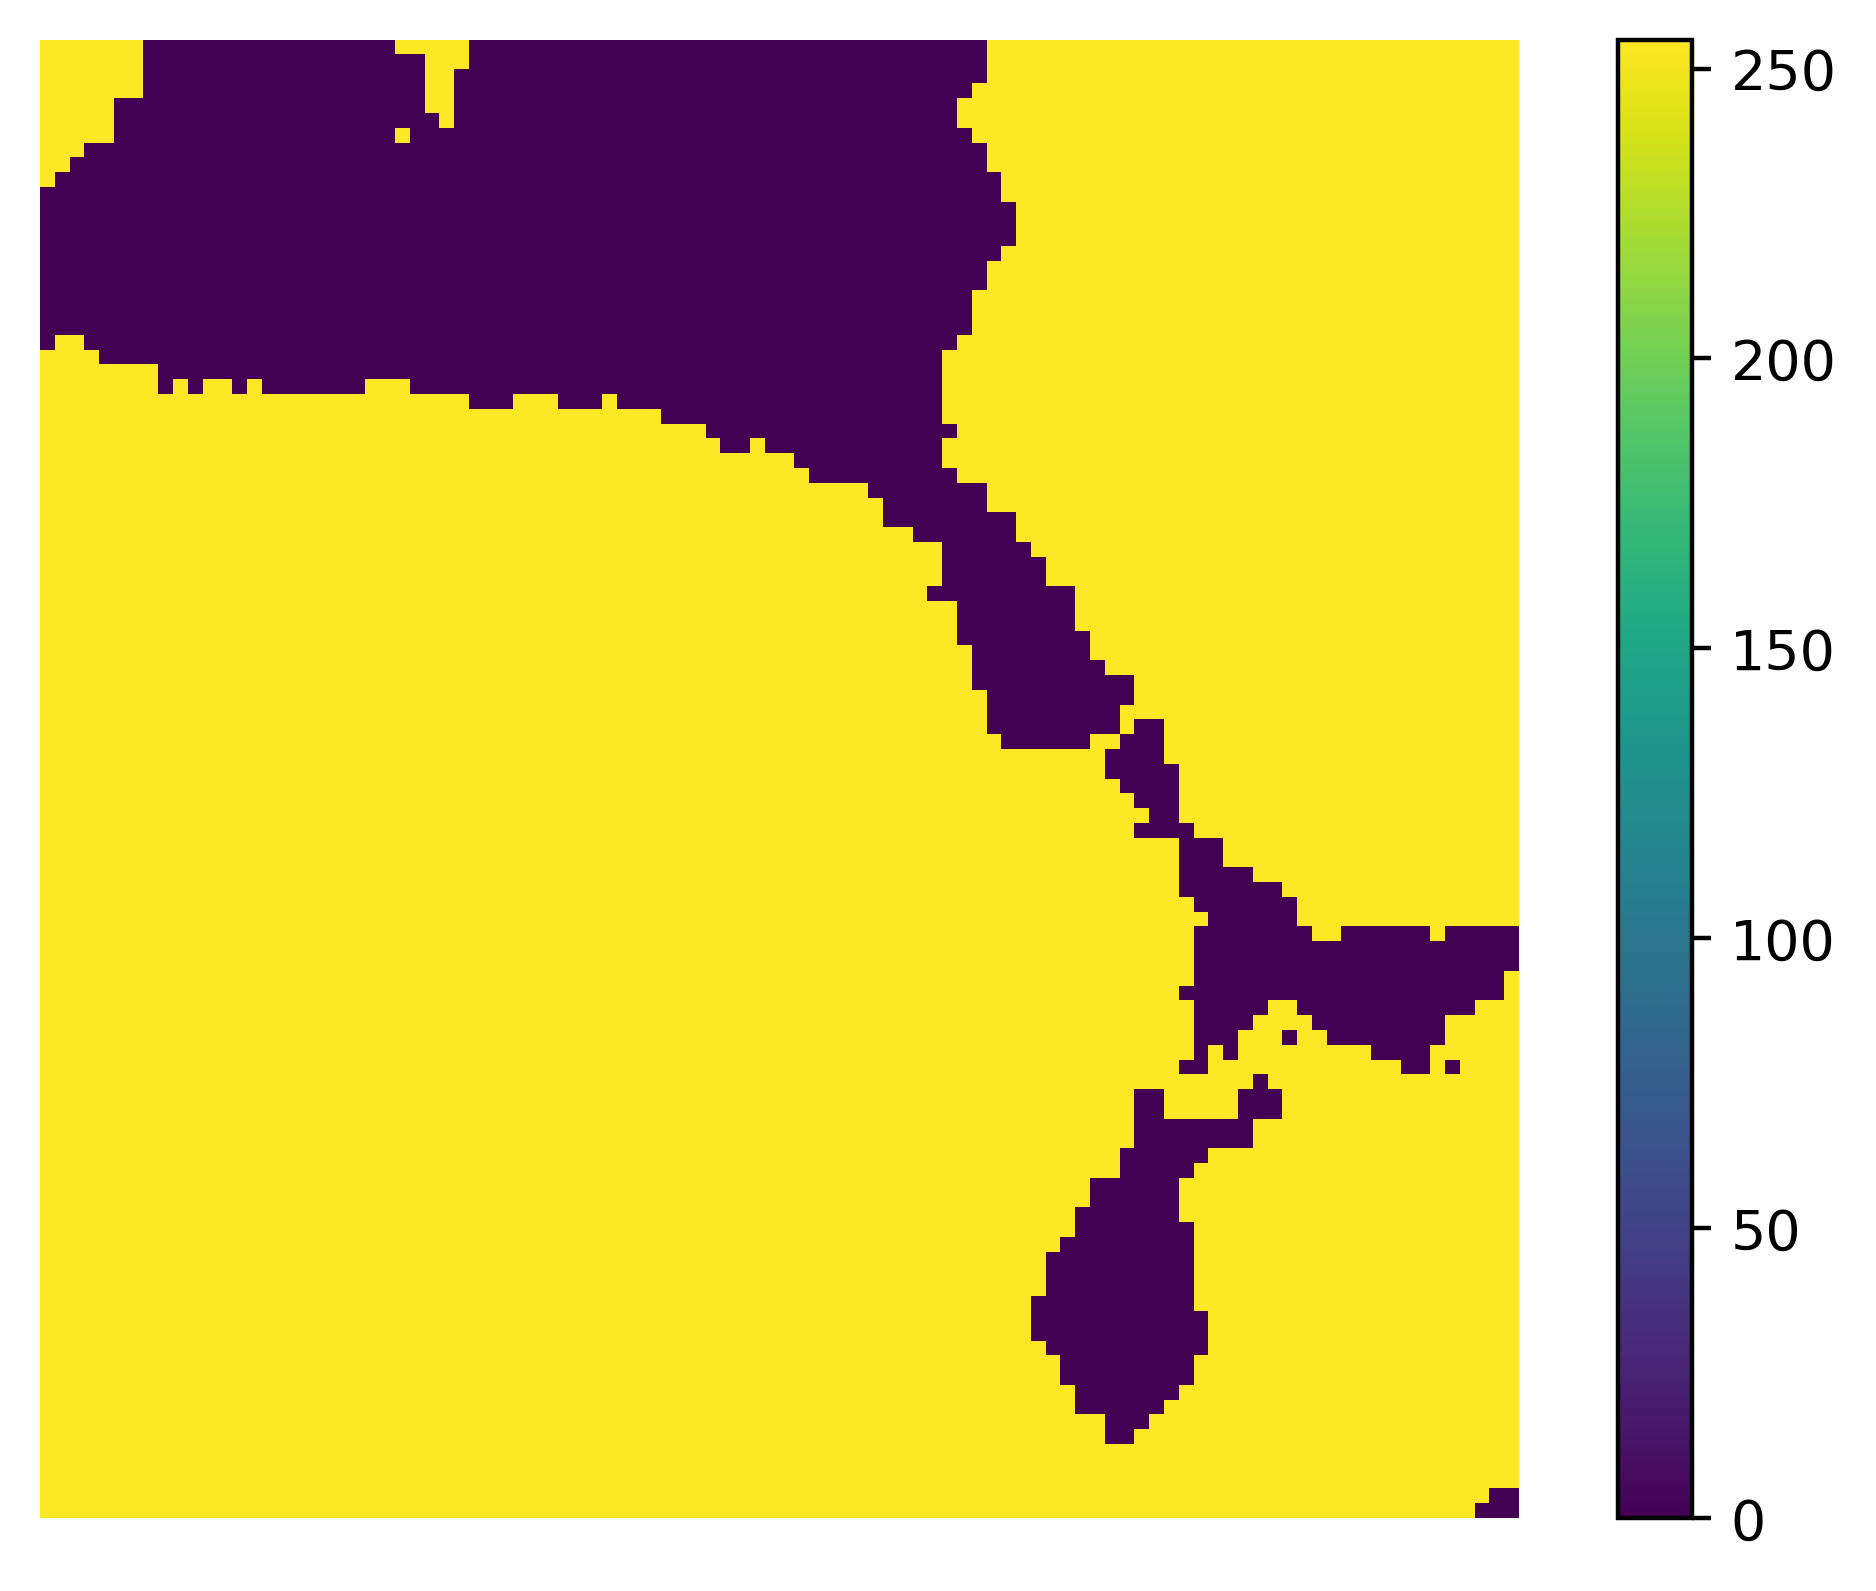

In [14]:
p = dpm_vis.plot_slice(bentheimer_ss_data, slice_num=50)

Now, lets plot orthogonal slices using drp tools.

In [21]:
p = dpm_vis.orthogonal_slices(bentheimer_ss_data, slider=True)
p.show()

Widget(value='<iframe src="http://localhost:35017/index.html?ui=P_0x7f6ca873b550_0&reconnect=auto" class="pyvi…

Plot_isosurface function plots the specified isosurface between different phases.

In [23]:
p = dpm_vis.plot_isosurface(bentheimer_ss_data, show_isosurface=[0.5])
p.show()

Widget(value='<iframe src="http://localhost:35017/index.html?ui=P_0x7f6ca9757e50_2&reconnect=auto" class="pyvi…

Time for velocity fields! <br>

We can now use plot_glyph function to see our velocity data in 3D. <br>

Here, we also call plot isosurfaces to visualize our surface along with the velocity field data. Watch that plot isosurface function uses the figure output from plot glyph.

In [26]:
p = dpm_vis.plot_glyph(bentheimer_ss_data)
dpm_vis.plot_isosurface(bentheimer_ss_data, 
                        show_isosurface=[0.5],
                        fig=p)

p.show()

Widget(value='<iframe src="http://localhost:35017/index.html?ui=P_0x7f6ca83b4750_6&reconnect=auto" class="pyvi…

Finally, we can plot our streamlines. Similar to the glyph function, we use the figure from glpyh as input to a bounding box and plot isosurface functions.

In [27]:
## Plotting the streamlines with a bounding box
fig_streamlines = dpm_vis.plot_streamlines(bentheimer_ss_data)

## Adding a bounding box to the streamlines
dpm_vis.bounding_box(bentheimer_ss_data, fig=fig_streamlines)
dpm_vis.plot_isosurface(bentheimer_ss_data, fig=fig_streamlines,
                           mesh_kwargs={'color': (255, 255, 255), 'opacity': 0.15})
fig_streamlines.show()

Widget(value='<iframe src="http://localhost:35017/index.html?ui=P_0x7f6c944d36d0_7&reconnect=auto" class="pyvi…

______